# Advanced Machine Learning 12

# Perform the SVD on Image 2

In [1]:
# import module
# Import PIL module
from PIL import Image

# open method used to open different extension image file
im=Image.open(r"K:\Advanced Ml\Dataset\img2.jpg")

# This method will show image in any viwer
im.show()

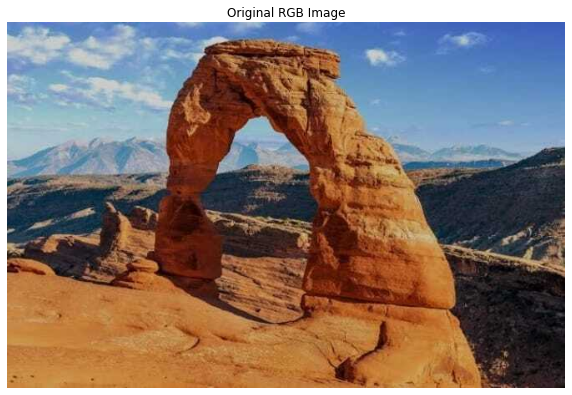

In [4]:
# used to see image on the same jupyter notebook
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread(r"K:\Advanced Ml\Dataset\img2.jpg")
plt.figure(figsize=(10,10))
plt.axis('off')                                 # we don't want image in graph form x and y axis
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) # by default it is BGR
plt.title('Original RGB Image')
plt.show()

# In order to convert to gray scale = BGR2GRAY , to BGR = BGR2BGR

In [5]:

# calculating the SD
u,s,v=np.linalg.svd(img, full_matrices=False)


# inspect shapes of the matrices
print(f'u.shape{u.shape},s.shape:{s.shape},v.shape:{v.shape}')

u.shape(438, 669, 3),s.shape:(438, 3),v.shape:(438, 3, 3)


**Gray Image**

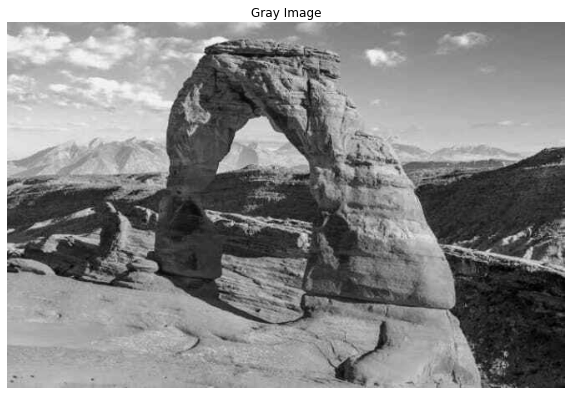

In [6]:
gray_image=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(gray_image,cmap='gray')
plt.axis('off')
plt.title('Gray Image')
plt.show()

In [7]:
# Converting the image into gray scale for faster computation
gray_image=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Calculating SVD
u,s,v=np.linalg.svd(gray_image,full_matrices=False)

# Inspect shape of the matrics
print(f'u.shape:{u.shape},s.shape{s.shape},v.shape{v.shape}')

u.shape:(438, 438),s.shape(438,),v.shape(438, 669)


The above output shape indicates that there are 720 Lineraly Independent Components

**BGR2BGR**

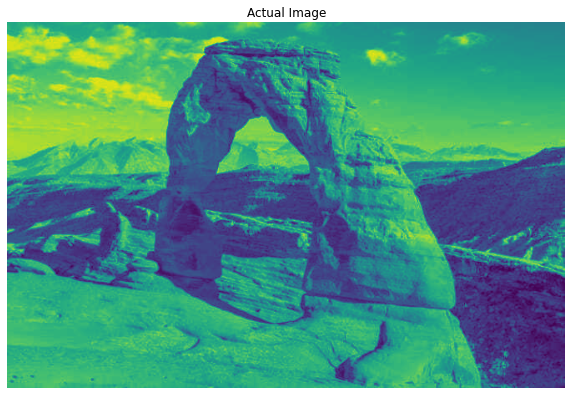

In [8]:
plt.figure(figsize=(10,10))
orig_rank=u[:, :]@np.diag(s[:])@v[:,:]
plt.imshow(orig_rank)
plt.axis('off')
plt.title('Actual Image')
plt.show()

**Important**

Variance Explained by Top 20 singular values:
[9.09328e-01 2.71970e-02 1.20040e-02 7.75700e-03 4.45300e-03 4.19200e-03
 3.06400e-03 2.54000e-03 2.28300e-03 1.81600e-03 1.50200e-03 1.44000e-03
 1.25800e-03 1.16900e-03 1.08400e-03 1.03300e-03 8.90000e-04 8.24000e-04
 7.29000e-04 6.61000e-04]


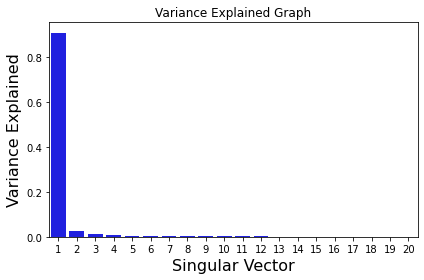

In [9]:
import seaborn as sns
var_explained=np.around(s**2/np.sum(s**2),decimals=6)

#Variance explained top singular vector
print(f'Variance Explained by Top 20 singular values:\n{var_explained[0:20]}')
sns.barplot(x=list(range(1,21)),
           y=var_explained[0:20],color='blue')
plt.title('Variance Explained Graph')
plt.xlabel('Singular Vector',fontsize=16)
plt.ylabel('Variance Explained',fontsize=16)
plt.tight_layout()
plt.show()

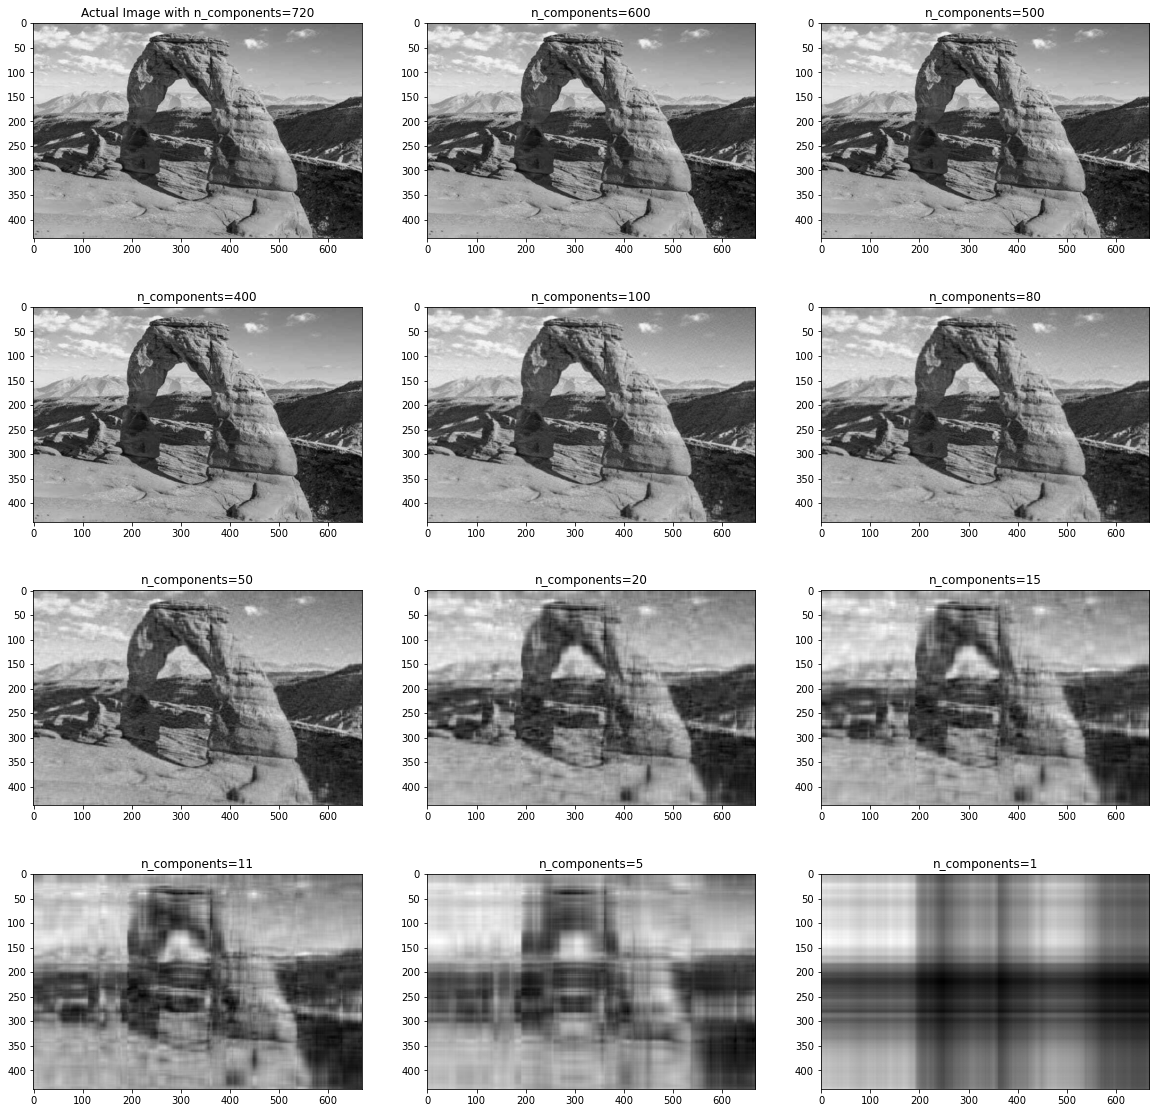

In [10]:
# plot images with different number of components

comps=[720,600,500,400,100,80,50,20,15,11,5,1]
plt.figure(figsize=(20,20))
for i in range(len(comps)):
    low_rank=u[:,:comps[i]]@np.diag(s[:comps[i]])@v[:comps[i],:]
    
    if(i==0):
        plt.subplot(4,3,i+1),
        plt.imshow(low_rank,cmap='gray'),
        plt.title(f"Actual Image with n_components={comps[i]}")
        
    else:
        plt.subplot(4,3,i+1),
        plt.imshow(low_rank,cmap='gray'),
        plt.title(f"n_components={comps[i]}")